# Введение
Мною был выбран датасет ["Instagram Analytics Dataset"](https://www.kaggle.com/datasets/kundanbedmutha/instagram-analytics-dataset?resource=download) с Kaggle.

<u>Предметная область:</u> социальные сети, аналитика эффективности контента в Instagram.

<u>Источник данных:</u> синтетически сгенерированные данные.

<u>Характер данных:</u> имитационные данные для анализа метрик вовлеченности.

<u>Атрибуты, представленные в датасете:</u>
- post_id: строковый, уникальный идентификатор поста
- upload_date: строковый, дата публикации поста
- media_type: строковый, тип контента (Photo, Video, Reel, Carousel)
- likes: числовой, количество лайков
- comments: числовой, количество комментариев
- shares: числовой, количество репостов
- saves: числовой, количество сохранений
- reach: числовой, охват (уникальные пользователи)
- impressions: числовой, показы (общее количество просмотров)
- caption_length: числовой, длина текста подписи

<u>Задача анализа:</u> выявить закономерности успешности контента, определить наиболее эффективные типы медиа и проанализировать влияние различных факторов на вовлеченность аудитории.

# Основная часть работы

In [26]:
# Основная часть работы

# импортируем все необходимые пакеты
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns

# считываем данные из csv-таблицы
df = pd.read_csv('Instagram_Analytics.csv')

In [27]:
# рассчет среднего и СКО для каждого значения

likes_mid = df['likes'].mean()
likes_sd = df['likes'].std()

comments_mid = df['comments'].mean()
comments_sd = df['comments'].std()

shares_mid = df['shares'].mean()
shares_sd = df['shares'].std()

saves_mid = df['saves'].mean()
saves_sd = df['saves'].std()

reach_mid = df['reach'].mean()
reach_sd = df['reach'].std()

impressions_mid = df['impressions'].mean()
impressions_sd = df['impressions'].std()

caption_length_mid = df['caption_length'].mean()
caption_length_sd = df['caption_length'].std()

print(f'Лайки: среднее = {likes_mid:.2f}, СКО = {likes_sd:.2f}')
print(f'Комментарии: среднее = {comments_mid:.2f}, СКО = {comments_sd:.2f}')
print(f'Репосты: среднее = {shares_mid:.2f}, СКО = {shares_sd:.2f}')
print(f'Сохранения: среднее = {saves_mid:.2f}, СКО = {saves_sd:.2f}')
print(f'Охват: среднее = {reach_mid:.2f}, СКО = {reach_sd:.2f}')
print(f'Показы: среднее = {impressions_mid:.2f}, СКО = {impressions_sd:.2f}')
print(f'Длина подписи: среднее = {caption_length_mid:.2f}, СКО = {caption_length_sd:.2f}')

Лайки: среднее = 99912.66, СКО = 57905.97
Комментарии: среднее = 5017.78, СКО = 2888.40
Репосты: среднее = 2502.91, СКО = 1448.32
Сохранения: среднее = 7490.12, СКО = 4352.55
Охват: среднее = 996561.60, СКО = 577790.64
Показы: среднее = 1246668.83, СКО = 597092.37
Длина подписи: среднее = 1103.11, СКО = 635.99


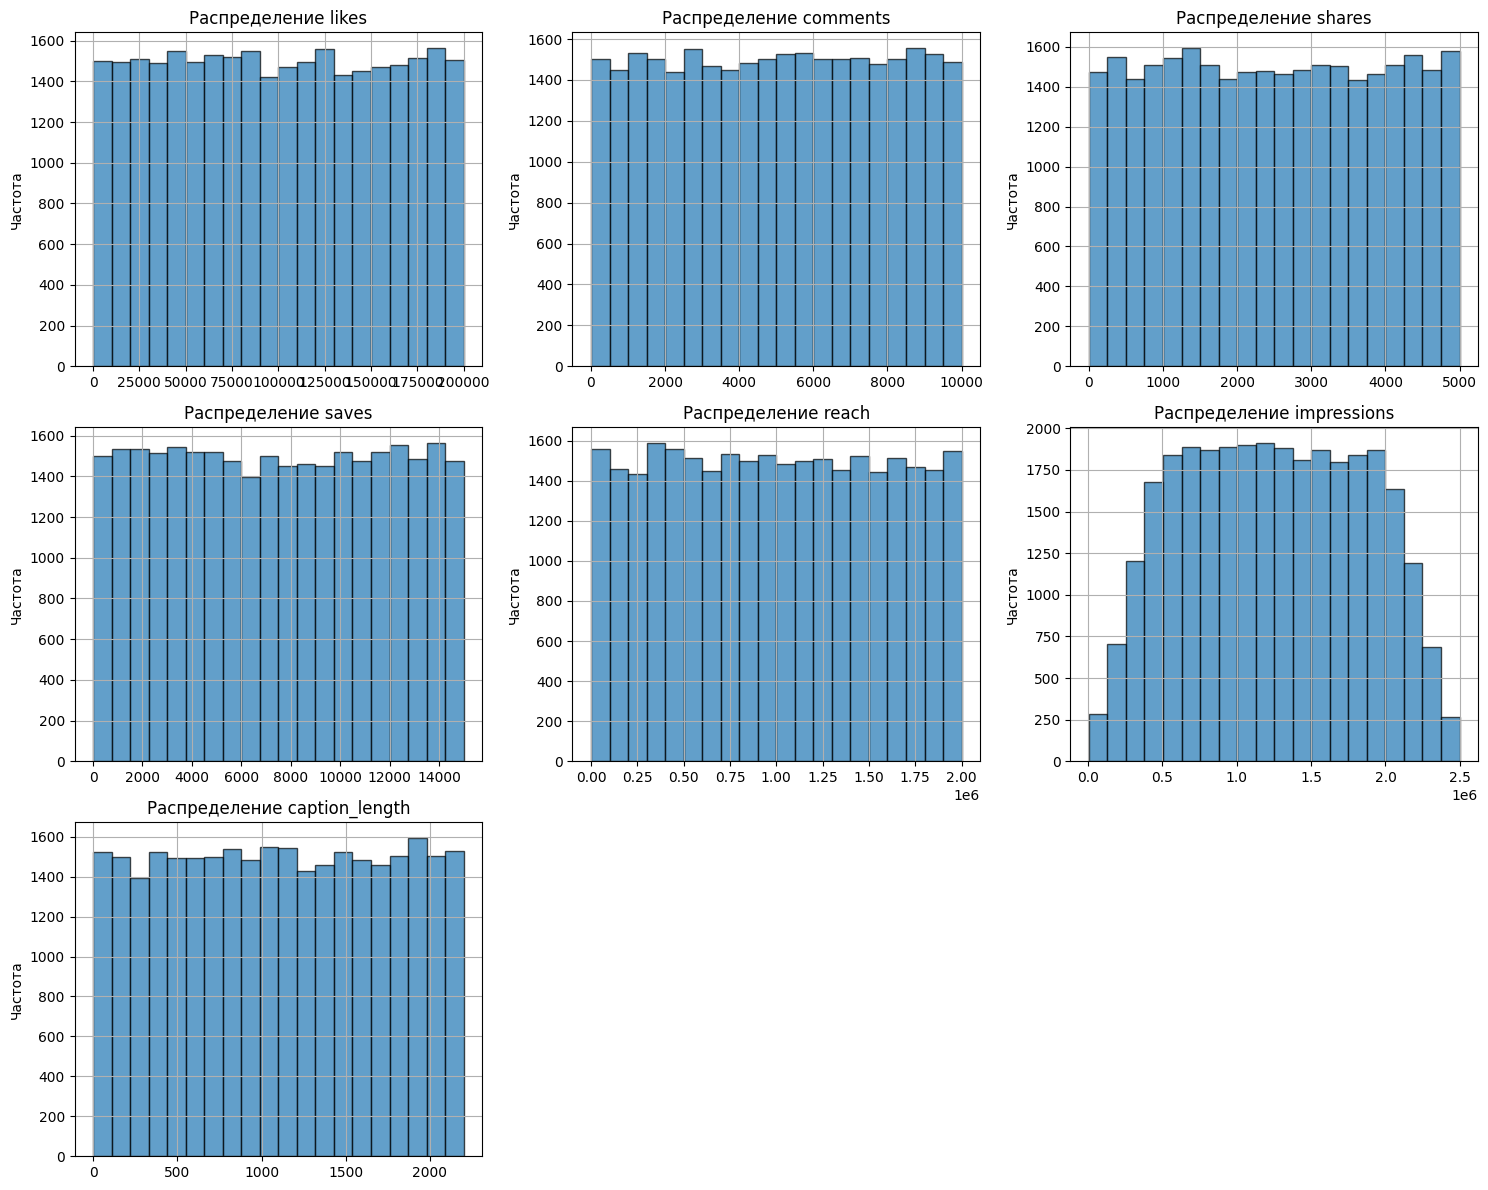

In [28]:
# построение гистограмм распределения для каждого атрибута
columns = ['likes', 'comments', 'shares', 'saves', 'reach', 'impressions', 'caption_length']

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(columns):
    df[col].hist(bins=20, ax=axes[i], edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Распределение {col}')
    axes[i].set_ylabel('Частота')

for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [29]:
# Для обнаружения выбросов буду использовать метод IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

likes_out = detect_outliers_iqr(df['likes'])
comments_out = detect_outliers_iqr(df['comments'])
shares_out = detect_outliers_iqr(df['shares'])
saves_out = detect_outliers_iqr(df['saves'])
reach_out = detect_outliers_iqr(df['reach'])
impressions_out = detect_outliers_iqr(df['impressions'])
caption_length_out = detect_outliers_iqr(df['caption_length'])

print(f'Кол-во выбросов в likes = {sum(likes_out)}')
print(f'Кол-во выбросов в comments = {sum(comments_out)}')
print(f'Кол-во выбросов в shares = {sum(shares_out)}')
print(f'Кол-во выбросов в saves = {sum(saves_out)}')
print(f'Кол-во выбросов в reach = {sum(reach_out)}')
print(f'Кол-во выбросов в impressions = {sum(impressions_out)}')
print(f'Кол-во выбросов в caption_length = {sum(caption_length_out)}')

Кол-во выбросов в likes = 0
Кол-во выбросов в comments = 0
Кол-во выбросов в shares = 0
Кол-во выбросов в saves = 0
Кол-во выбросов в reach = 0
Кол-во выбросов в impressions = 0
Кол-во выбросов в caption_length = 0


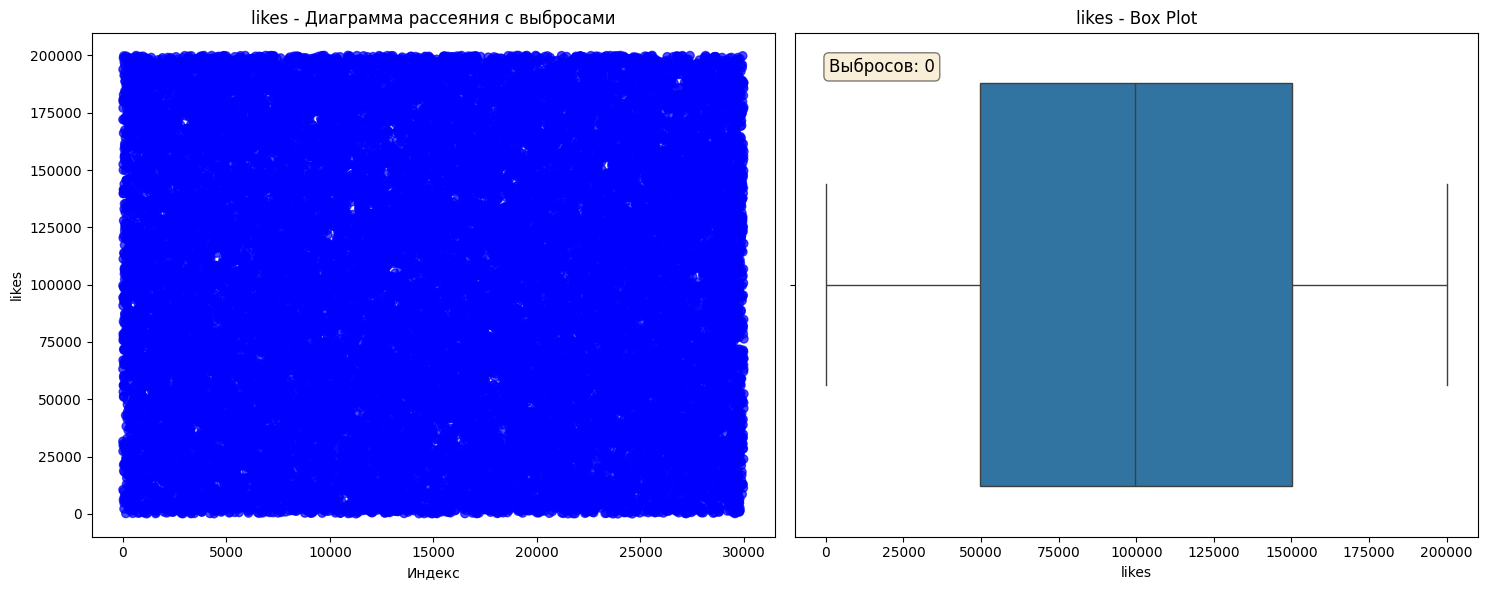

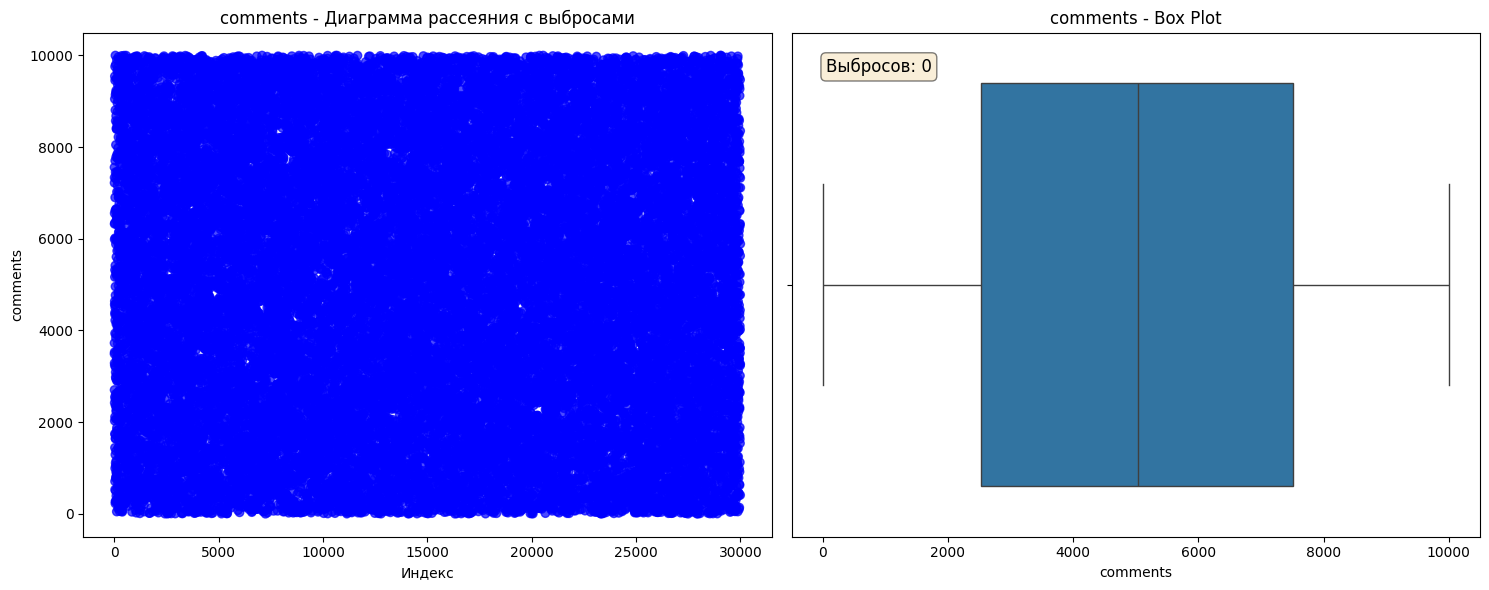

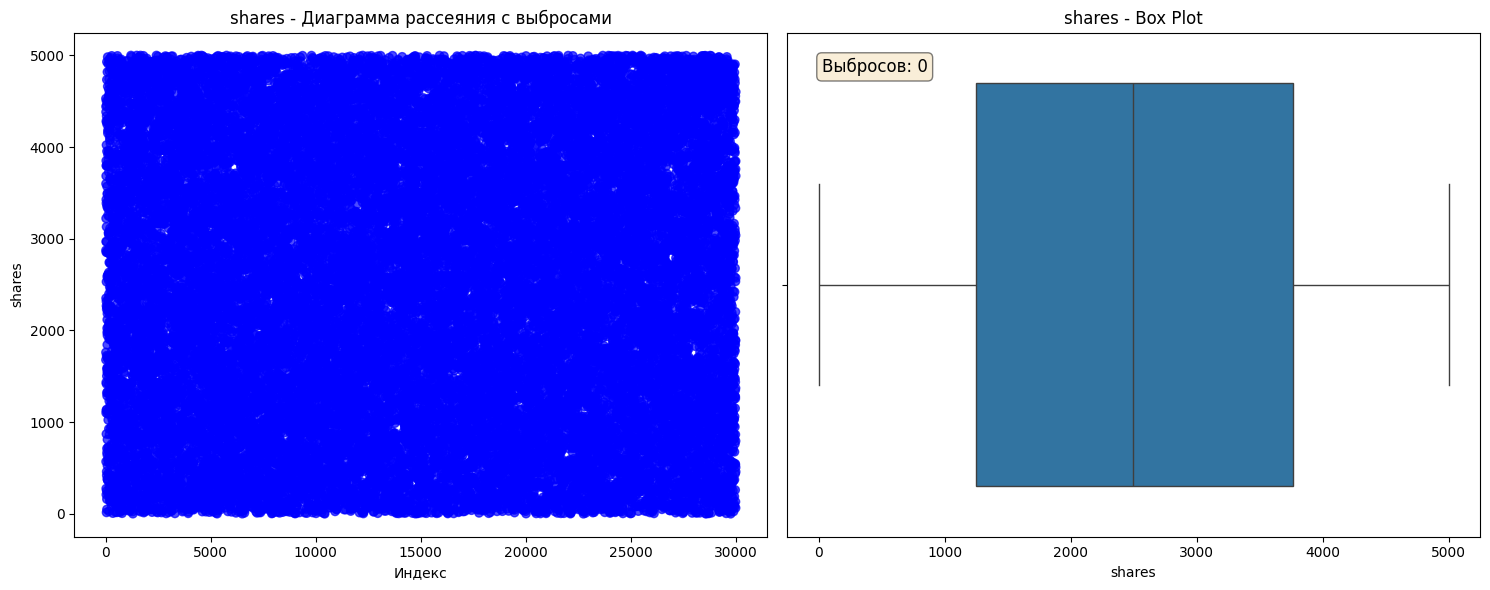

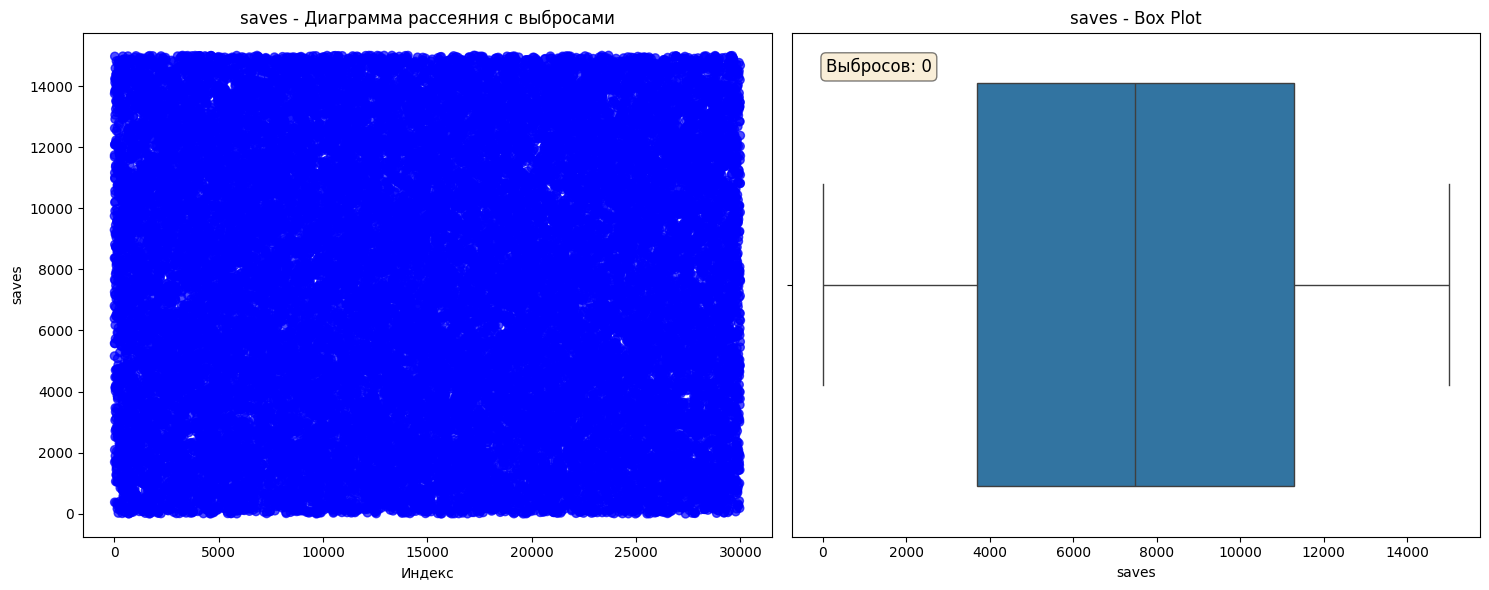

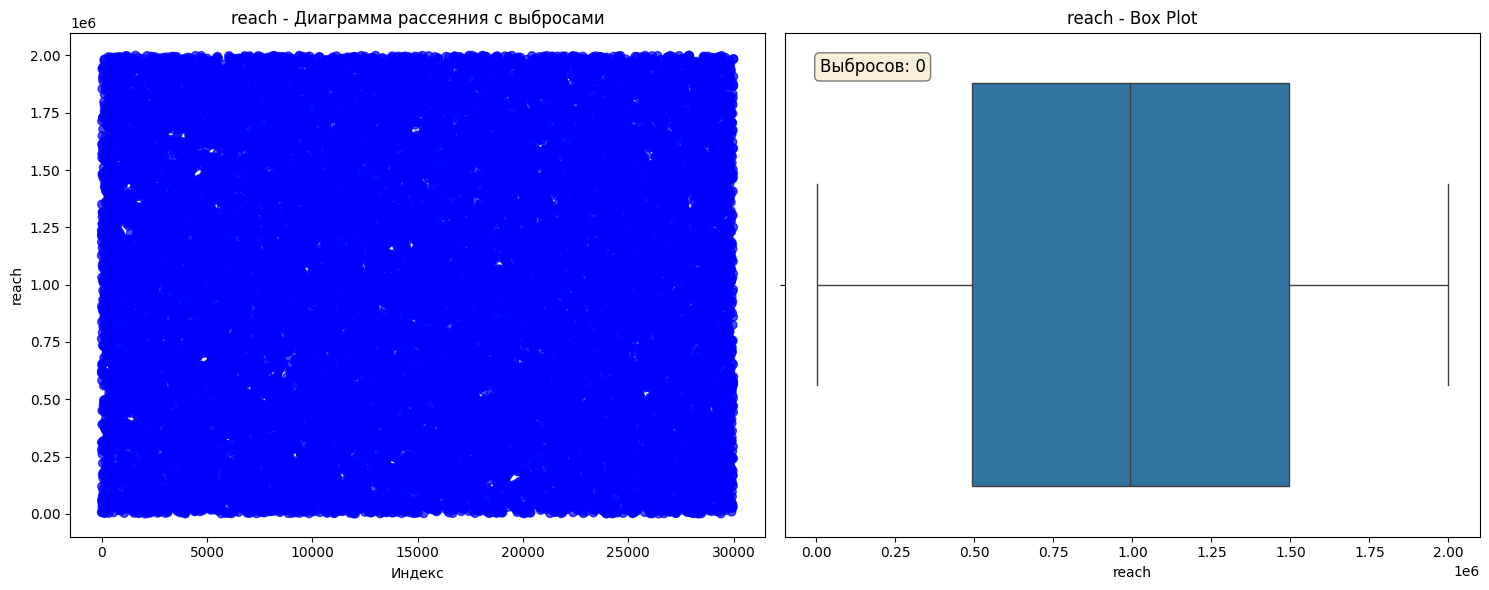

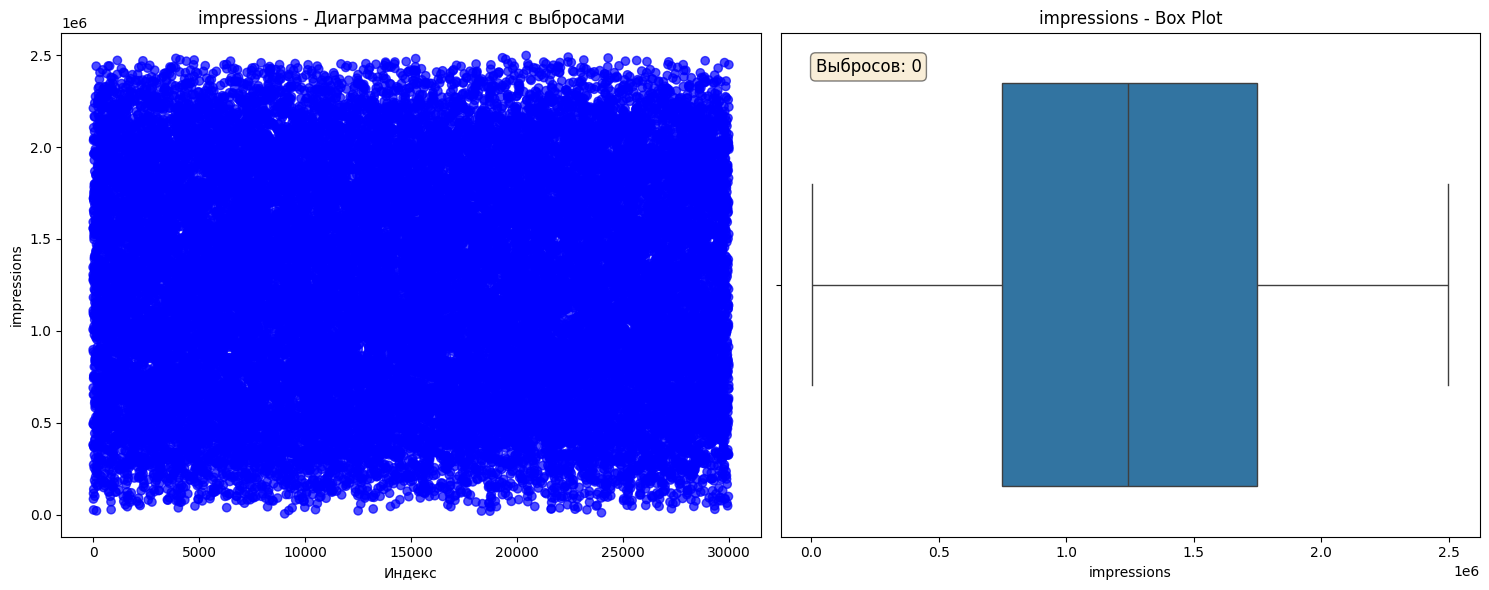

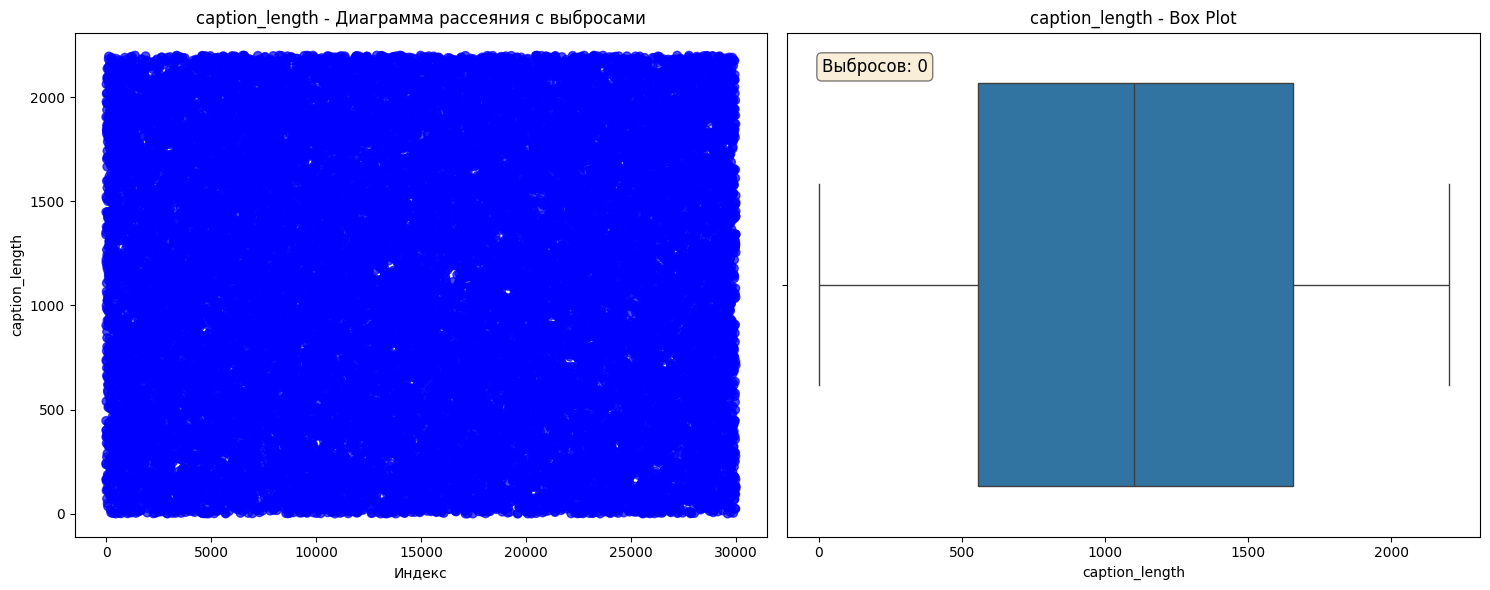

In [41]:
# Визуализируем выбросы с помощью диаграммы рассеивания и коробчатых диаграмм
attributes = [
    ('likes', likes_out),
    ('comments', comments_out),
    ('shares', shares_out),
    ('saves', saves_out),
    ('reach', reach_out),
    ('impressions', impressions_out),
    ('caption_length', caption_length_out)
]

for col, outliers in attributes:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    data = df[col]
    colors = ['blue' if not x else 'red' for x in outliers]

    ax1.scatter(range(len(data)), data, c=colors, alpha=0.7)
    ax1.set_title(f'{col} - Диаграмма рассеяния с выбросами')
    ax1.set_xlabel('Индекс')
    ax1.set_ylabel(col)

    outlier_indices = outliers[outliers].index
    for idx in outlier_indices:
        ax1.annotate(f'{data[idx]:.1f}',
                    (idx, data[idx]),
                    textcoords="offset points",
                    xytext=(0,10),
                    ha='center',
                    fontsize=8,
                    color='red')

    sns.boxplot(x=data, ax=ax2)
    ax2.set_title(f'{col} - Box Plot')
    ax2.set_xlabel(col)

    num_outliers = sum(outliers)
    ax2.text(0.05, 0.95, f'Выбросов: {num_outliers}',
             transform=ax2.transAxes, fontsize=12,
             verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    plt.tight_layout()
    plt.show()

    if num_outliers > 0:
        outlier_data = data[outliers]
        print(f"\nСтатистика выбросов для {col}:")
        print(f"Количество: {num_outliers}")
        print(f"Значения: {outlier_data.values}")
        print(f"Индексы: {outlier_data.index.tolist()}")
        print("-" * 100)

__Пропущенных значений нет__

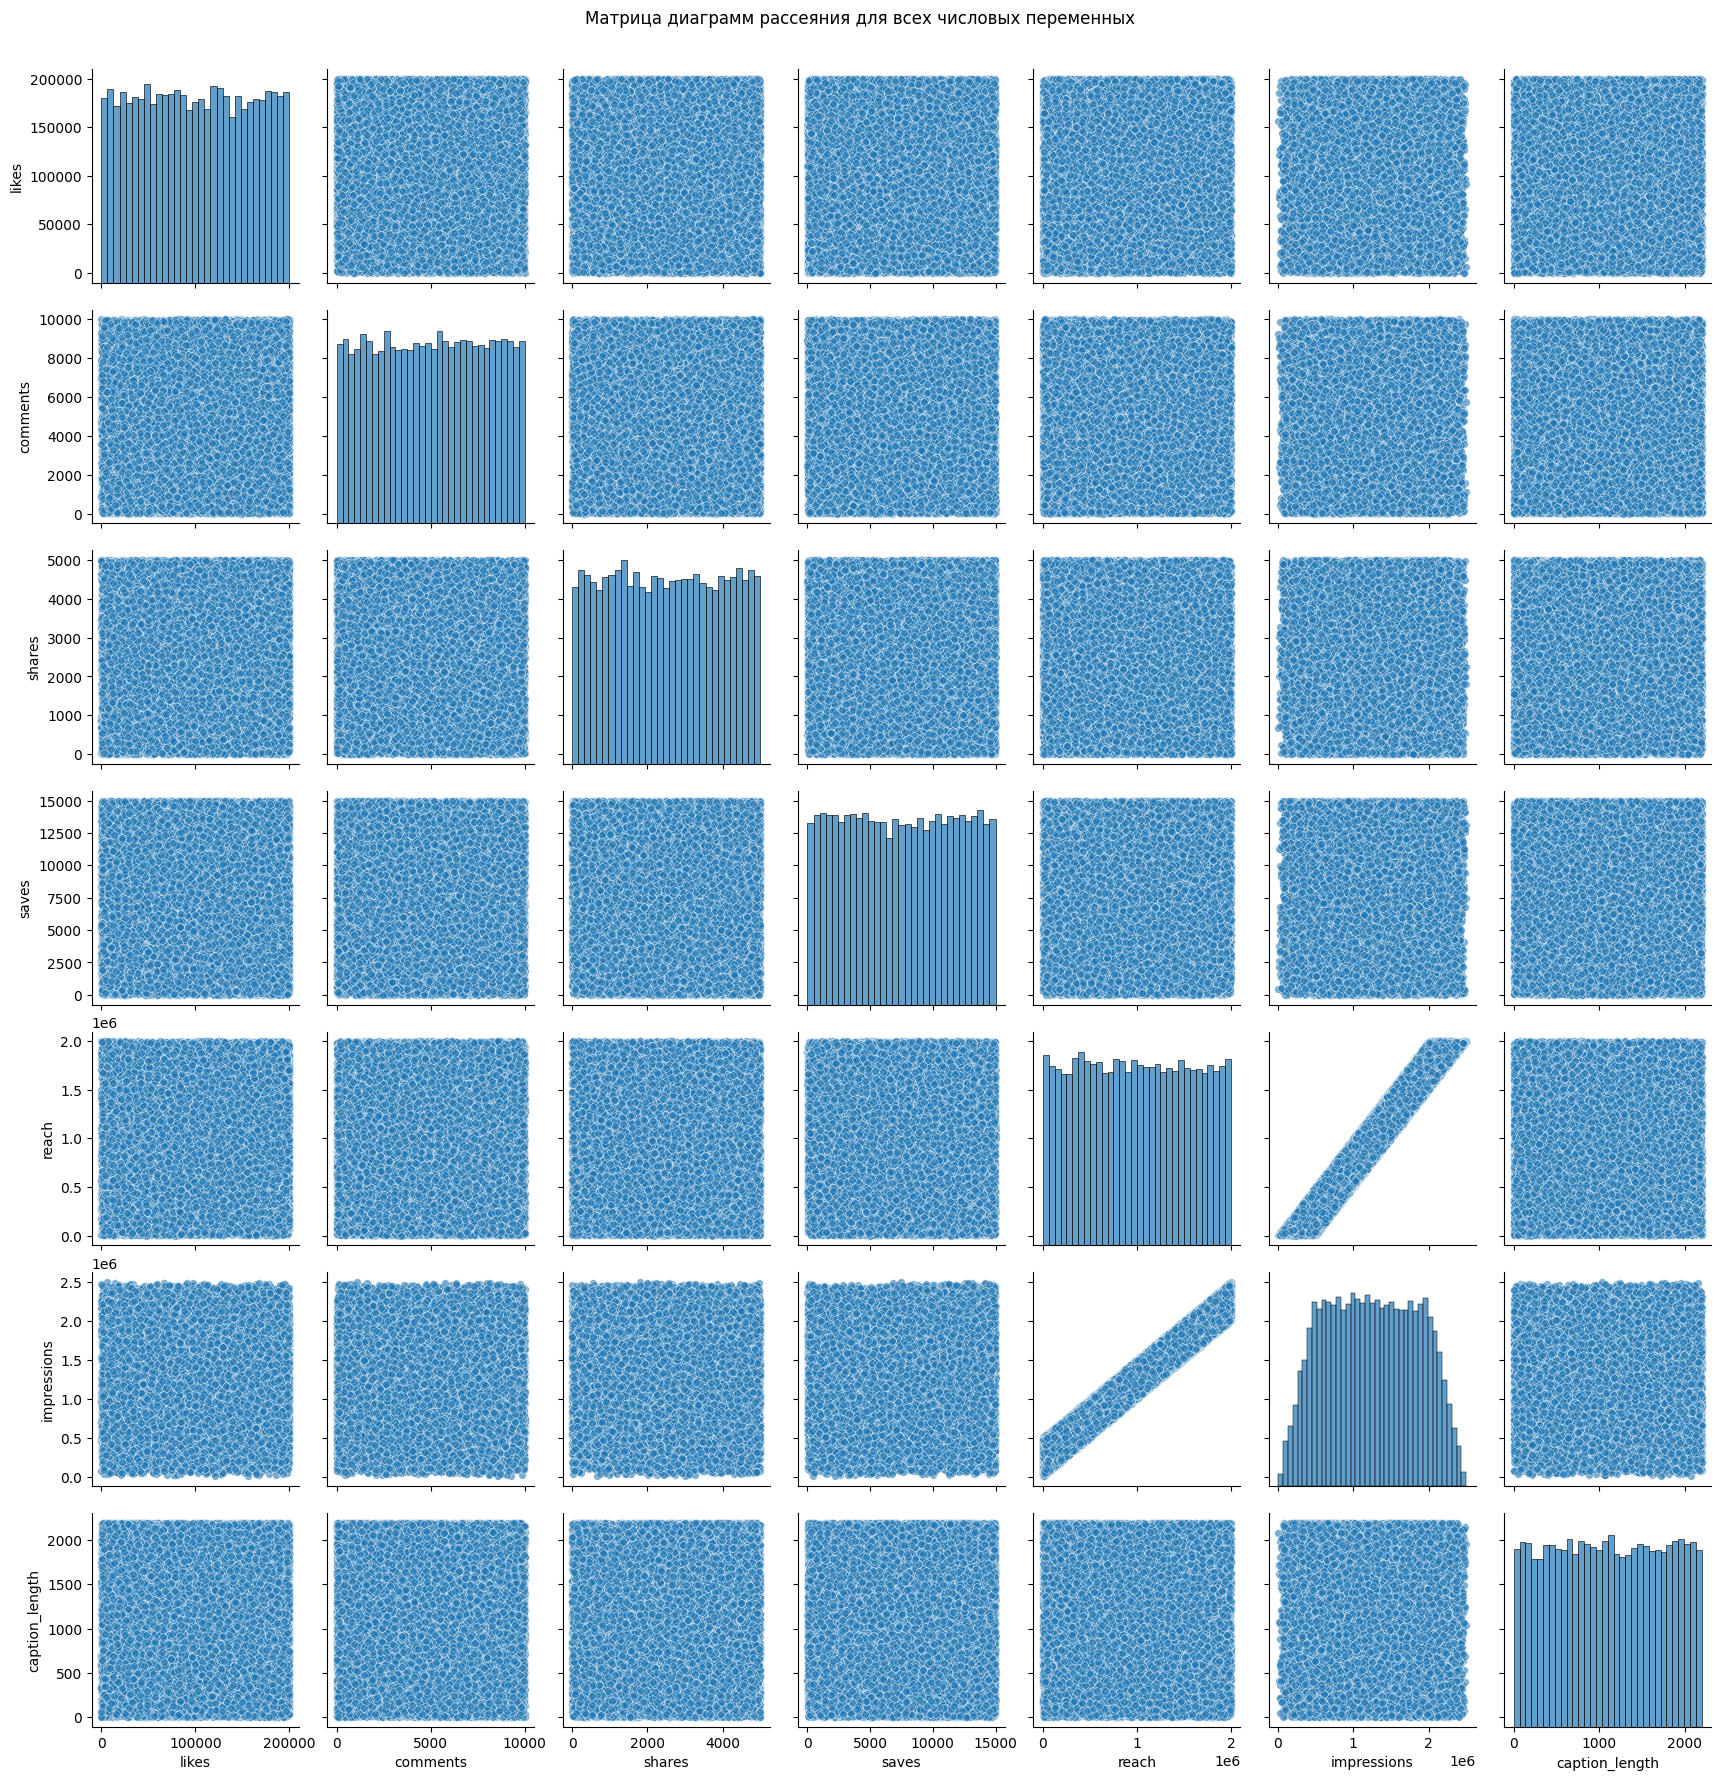

In [33]:
# Матрица диаграмм рассеяния
numeric_columns = ['likes', 'comments', 'shares', 'saves', 'reach', 'impressions', 'caption_length']

sns.pairplot(df[numeric_columns],
             diag_kind='hist',
             plot_kws={'alpha': 0.6, 's': 30},
             diag_kws={'alpha': 0.7})
plt.suptitle('Матрица диаграмм рассеяния для всех числовых переменных', y=1.02)
plt.show()

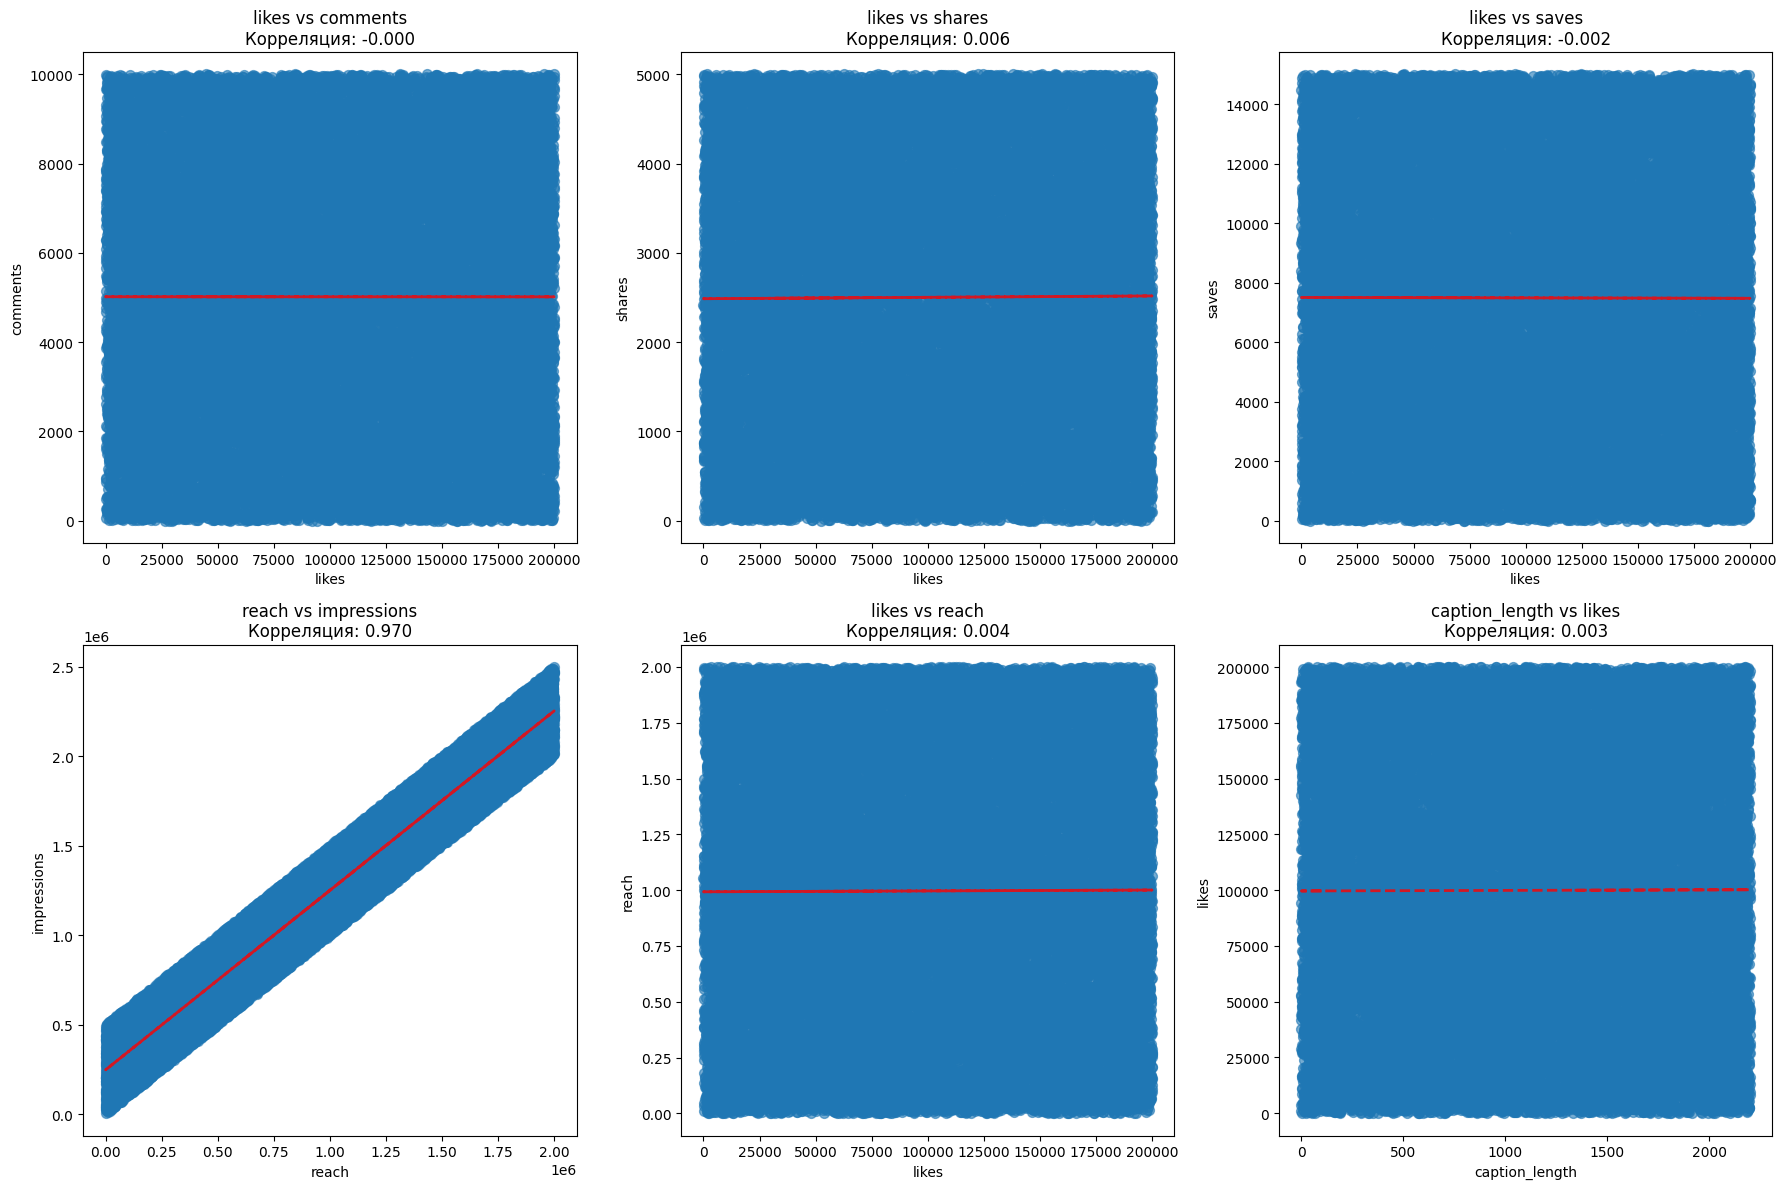

In [36]:
# Корреляцию можно проследить на следующих парах:
# - лайки - комментарии
# - лайки - репосты
# - лайки - сохранения
# - охват - показы
# - лайки - охват
# - длина подписи - лайки

key_pairs = [
    ('likes', 'comments'),
    ('likes', 'shares'),
    ('likes', 'saves'),
    ('reach', 'impressions'),
    ('likes', 'reach'),
    ('caption_length', 'likes'),
]

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, (x_col, y_col) in enumerate(key_pairs):
    scatter = axes[i].scatter(df[x_col], df[y_col], alpha=0.6, s=50)
    axes[i].set_xlabel(x_col)
    axes[i].set_ylabel(y_col)

    # Добавляем линию тренда
    z = np.polyfit(df[x_col], df[y_col], 1)
    p = np.poly1d(z)
    axes[i].plot(df[x_col], p(df[x_col]), "r--", alpha=0.8, linewidth=2)

    corr = df[x_col].corr(df[y_col])
    axes[i].set_title(f'{x_col} vs {y_col}\nКорреляция: {corr:.3f}')



plt.tight_layout()
plt.show()

# Выводы
Из представленных данных видно, что количество лайков сильно коррелирует с количеством комментариев и сохранений, охват сильно коррелирует с показами, а длина подписи слабо коррелирует с количеством лайков.